In [ ]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()
print("Shape of x_train:{}".format(x_train.shape))
print("Shape of y_train:{}".format(y_train.shape))
print("Shape of x_test:{}".format(x_test.shape))
print("Shape of y_test:{}".format(y_test.shape))


11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train:(60000, 28, 28)
Shape of y_train:(60000,)
Shape of x_test:(10000, 28, 28)
Shape of y_test:(10000,)


In [ ]:
from IPython.display import display
import pandas as pd
print("Shape for dataset:{}".format(x_train.shape))
print("Labels:{}".format(y_train))
# single x_train digit
single = x_train[0]
print("Shape for single:{}".format(single.shape))
display(pd.DataFrame(single.reshape(28,28)))

Shape for dataset:(60000, 28, 28)
Labels:[5 0 4 ... 5 6 8]
Shape for single:(28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


# Display as Image

Image #130, which is digit:3


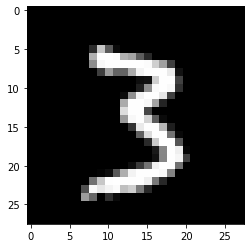

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
digit = 130
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image #{}, which is digit:{}".format(digit,y_train[digit]))

# Developing a Convolutional Neural Network (CNN) to train and test MNIST data and fashion_MNIST data  

In [ ]:
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import time

(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()
print("Shape of x_train:{}".format(x_train.shape))
print("Shape of y_train:{}".format(y_train.shape))
print("Shape of x_test:{}".format(x_test.shape))
print("Shape of y_test:{}".format(y_test.shape))

batch_size = 128
num_classes = 10
epochs = 12

#input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

#Converting to floating point value and normalizing for feeding into neural network model
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#data values are made zero centered
#x_train = (x_train-128) / 128
#x_test = (x_test-128) / 128
x_train = x_train / 255
x_test = x_test / 255
print("x_train shape :{}".format(x_train.shape))
print("Training samples :{} ".format(x_train.shape[0]))
print("Test samples :{}".format(x_test.shape[0]))

#Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

#building CNN
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

#Train the model with the train data set
start_time = time.time()
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=2,validation_data=(x_test,y_test))
#test the model with the test data set
score = model.evaluate(x_test,y_test,verbose=0)
print("test_loss:{}".format(score[0]))
print("test accuracy:{}".format(score[1]))
elapsed_time=time.time()-start_time
print("Elapsed Time:{}".format(elapsed_time))



Shape of x_train:(60000, 28, 28)
Shape of y_train:(60000,)
Shape of x_test:(10000, 28, 28)
Shape of y_test:(10000,)
x_train shape :(60000, 28, 28, 1)
Training samples :60000 
Test samples :10000
Epoch 1/12
469/469 - 4s - loss: 0.5269 - accuracy: 0.8145 - val_loss: 0.3304 - val_accuracy: 0.8798
Epoch 2/12
469/469 - 3s - loss: 0.3396 - accuracy: 0.8796 - val_loss: 0.2791 - val_accuracy: 0.8991
Epoch 3/12
469/469 - 3s - loss: 0.2899 - accuracy: 0.8954 - val_loss: 0.2620 - val_accuracy: 0.9028
Epoch 4/12
469/469 - 3s - loss: 0.2584 - accuracy: 0.9061 - val_loss: 0.2429 - val_accuracy: 0.9113
Epoch 5/12
469/469 - 3s - loss: 0.2348 - accuracy: 0.9138 - val_loss: 0.2374 - val_accuracy: 0.9144
Epoch 6/12
469/469 - 3s - loss: 0.2199 - accuracy: 0.9196 - val_loss: 0.2212 - val_accuracy: 0.9156
Epoch 7/12
469/469 - 3s - loss: 0.1997 - accuracy: 0.9256 - val_loss: 0.2344 - val_accuracy: 0.9152
Epoch 8/12
469/469 - 3s - loss: 0.1845 - accuracy: 0.9314 - val_loss: 0.2167 - val_accuracy: 0.9213
Epoch